In [1]:
from finn_examples.driver import FINNExampleOverlay
from qonnx.core.datatype import DataType
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/share/pynq-venv/lib/python3.8/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)
/usr/local/share/pynq-venv/lib/python3.8/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)
/usr/local/share/pynq-venv/lib/python3.8/site-packages/pynq/pl_server/xrt_device.py:59: UserWarning: xbutil failed to run - unable to determine XRT version
  warnings.warn("xbutil failed to run - unable to determine XRT version")


In [2]:
_cifar10_cnv_io_shape_dict = {
    "idt" : [DataType['UINT8']],
    "odt" : [DataType['UINT8']],
    "ishape_normal" : [(1, 32, 32, 3)],
    "oshape_normal" : [(1, 1)],
    "ishape_folded" : [(1, 32, 32, 3, 1)],
    "oshape_folded" : [(1, 1, 1)],
    "ishape_packed" : [(1, 32, 32, 3, 1)],
    "oshape_packed" : [(1, 1, 1)],
    "input_dma_name" : ['idma0'],
    "output_dma_name" : ['odma0'],
    "number_of_external_weights": 0,
    "num_inputs" : 1,
    "num_outputs" : 1,
}


In [3]:
!pwd

/home/root/jupyter_notebooks/case_2024/finn


In [4]:
# filename= "cnn_1w1a.bit"
filename="./models/cnn_1w1a_v3.bit"
driver_mode= "zynq-iodma"
accel= FINNExampleOverlay(filename, driver_mode, _cifar10_cnv_io_shape_dict)

In [5]:
# from dataset_loading import cifar
# trainx, trainy, testx, testy, valx, valy = cifar.load_cifar_data("/tmp", download=True, one_hot=False)

In [6]:
# test_single_x = testx[0]
# test_single_y = testy[0]
# cifar10_class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

# plt.imshow(test_single_x)
# plt.show()

In [8]:
# test_single_x.shape

In [9]:
# print("Expected class is %d (%s)" % (test_single_y, cifar10_class_names[test_single_y]))

In [10]:
# accel_in = test_single_x.reshape(accel.ishape_normal())
# print("Input buffer shape is %s and datatype is %s" % (str(accel_in.shape), str(accel_in.dtype)))

In [11]:
# accel_out = accel.execute(accel_in)

In [12]:
# accel_out

In [13]:
# print("Returned class is %d" % accel_out)

In [14]:
images_path= "/home/root/jupyter_notebooks/case_2024/datasets/svhn_images"
files= os.listdir(images_path)

In [15]:
def preprocess_fn(image_path):
    mean= [0.4376821, 0.4437697, 0.47286442]
    std= [0.19803012, 0.20101562, 0.19703614]
    image = cv2.imread(image_path)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     image = image.reshape(32,32,3)
#     image= np.expand_dims(image, axis=0)
#     image = image * (1/255.0)
#     image = image.reshape(accel.ishape_normal())*255

#     image= (image-mean)/std
    #image= image* fix_scale
#     image= image.astype(np.intc)
    return image

'seven_6773.png'

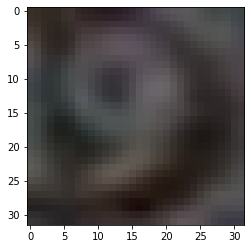

In [16]:
img= preprocess_fn(images_path+"/"+files[500])
plt.imshow(img)

files[0]

In [17]:
test_data= np.empty((len(files),32,32,3), dtype= np.uint8)
#test_data.shape
i=0
for file in files:
    
    image_path= os.path.join(images_path, file)
    img_pre= preprocess_fn(image_path)
    test_data[i,...]= img_pre
    i+=1

In [18]:
test_data[0].min(), test_data[0].max()

(19, 209)

In [19]:
loader= iter(test_data)

next(loader).shape

(32, 32, 3)

In [20]:
test_data[0].shape

(32, 32, 3)

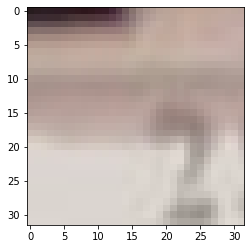

In [21]:
plt.imshow(test_data[200])

In [22]:
classes = ['zero', 'one' , 'two',
    'trhee', 'four', 'five',
    'six', 'seven', 'eight', 'nine']

clases_np= np.array(classes)

classes_dict= {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three':3,
    'four':4,
    'five':5,
    'six': 6,
    'seven':7,
    'eight':8,
    'nine':9
}

classes_dict['four']

4

In [23]:
str_labels= []
np_labels= np.empty(len(files))
i=0
for file in files:
    str_labels.append(file.split("_")[0])
    np_labels[i]= classes_dict[file.split("_")[0]]
    i+=1

In [24]:
np.unique(np_labels)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

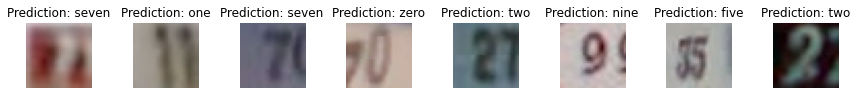

In [25]:
num_pics  = 8
fix, ax = plt.subplots(1, num_pics, figsize=(12,12))
plt.tight_layout()
for i in range(num_pics):
    
    accel_in = test_data[i].reshape(accel.ishape_normal())
    #image[0,...] = test_data[i]
    #job_id = dpu.execute_async(input_data, output_data)
    #dpu.wait(job_id)
    #temp = [j.reshape(1, outputSize) for j in output_data]
    accel_out = accel.execute(accel_in)
    #softmax = calculate_softmax(temp[0][0])
    prediction = accel_out

    ax[i].set_title('Prediction: ' + classes[int(prediction)])
    ax[i].axis('off')
    ax[i].imshow(test_data[i])

In [26]:
test_data[1].max()

170

In [27]:
accel.throughput_test()

{'runtime[ms]': 0.5404949188232422,
 'throughput[images/s]': 1850.1561535068372,
 'DRAM_in_bandwidth[MB/s]': 5.683679703573004,
 'DRAM_out_bandwidth[MB/s]': 0.0018501561535068372,
 'fclk[mhz]': 99.999,
 'batch_size': 1,
 'fold_input[ms]': 0.046253204345703125,
 'pack_input[ms]': 0.038623809814453125,
 'copy_input_data_to_device[ms]': 0.6895065307617188,
 'copy_output_data_from_device[ms]': 0.18143653869628906,
 'unpack_output[ms]': 0.47469139099121094,
 'unfold_output[ms]': 0.06341934204101562}

In [28]:
accel.ishape_normal()

(1, 32, 32, 3)

In [29]:
accel_in = test_data[0].reshape(accel.ishape_normal())

accel_out = accel.execute(accel_in)
print(int(accel_out[0]))

7


In [30]:
test_data[0].shape

(32, 32, 3)

In [31]:
test_data.shape

(25909, 32, 32, 3)

In [32]:
from time import time

correct= 0
total= 25909
start = time()

for i in range(total):
    
    accel_in = test_data[i].reshape(accel.ishape_normal())
    accel_out = accel.execute(accel_in)
    
    prediction = int(accel_out[0])
    if prediction==np_labels[i]:
        correct+=1

stop = time()
#correct = np.sum(clases_np[predictions]==test_label)
execution_time = stop-start
print("Overall accuracy: {}".format(correct/total))
print("  Execution time: {:.4f}s".format(execution_time))
print("      Throughput: {:.4f}FPS".format(total/execution_time))    

Overall accuracy: 0.9007294762437763
  Execution time: 26.2595s
      Throughput: 986.6528FPS


In [33]:
np_labels

array([7., 1., 7., ..., 8., 3., 5.])

In [34]:
testx= test_data[:25000]
testy= np_labels[:25000]

In [35]:
testx.shape, testy.shape

((25000, 32, 32, 3), (25000,))

In [36]:

batch_size = 1000
total = testx.shape[0]
accel.batch_size = batch_size
n_batches = int(total / batch_size)

batch_imgs = testx.reshape(n_batches, batch_size, -1)
batch_labels = testy.reshape(n_batches, batch_size)
obuf_normal = np.empty_like(accel.obuf_packed_device)
print("Ready to run validation, test images tensor has shape %s" % str(batch_imgs.shape))
print("Accelerator buffer shapes are %s for input, %s for output" % (str(accel.ishape_packed()), str(accel.oshape_packed())))

Ready to run validation, test images tensor has shape (25, 1000, 3072)
Accelerator buffer shapes are (1000, 32, 32, 3, 1) for input, (1000, 1, 1) for output


In [37]:
ok = 0
nok = 0
for i in range(n_batches):
    ibuf_normal = batch_imgs[i].reshape(accel.ishape_normal())
    exp = batch_labels[i]
    obuf_normal = accel.execute(ibuf_normal)
    ret = np.bincount(obuf_normal.flatten() == exp.flatten())
    nok += ret[0]
    ok += ret[1]
    print("batch %d / %d : total OK %d NOK %d" % (i, n_batches, ok, nok))

batch 0 / 25 : total OK 898 NOK 102
batch 1 / 25 : total OK 1797 NOK 203
batch 2 / 25 : total OK 2707 NOK 293
batch 3 / 25 : total OK 3615 NOK 385
batch 4 / 25 : total OK 4508 NOK 492
batch 5 / 25 : total OK 5412 NOK 588
batch 6 / 25 : total OK 6310 NOK 690
batch 7 / 25 : total OK 7217 NOK 783
batch 8 / 25 : total OK 8120 NOK 880
batch 9 / 25 : total OK 9031 NOK 969
batch 10 / 25 : total OK 9915 NOK 1085
batch 11 / 25 : total OK 10840 NOK 1160
batch 12 / 25 : total OK 11734 NOK 1266
batch 13 / 25 : total OK 12626 NOK 1374
batch 14 / 25 : total OK 13531 NOK 1469
batch 15 / 25 : total OK 14441 NOK 1559
batch 16 / 25 : total OK 15325 NOK 1675
batch 17 / 25 : total OK 16220 NOK 1780
batch 18 / 25 : total OK 17116 NOK 1884
batch 19 / 25 : total OK 18005 NOK 1995
batch 20 / 25 : total OK 18909 NOK 2091
batch 21 / 25 : total OK 19810 NOK 2190
batch 22 / 25 : total OK 20725 NOK 2275
batch 23 / 25 : total OK 21640 NOK 2360
batch 24 / 25 : total OK 22530 NOK 2470


In [38]:
acc = 100.0 * ok / (total)
print("Final accuracy: {}%".format(acc))

Final accuracy: 90.12%


In [39]:
def run_validation():
    for i in range(n_batches):
        ibuf_normal = batch_imgs[i].reshape(accel.ishape_normal())
        exp = batch_labels[i]
        accel.execute(ibuf_normal)

In [46]:
full_validation_time = %timeit -n 1 -o run_validation()

4.13 s ± 559 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
print("%f images per second including data movement" % (total / float(full_validation_time.best)))

6062.018558 images per second including data movement


In [42]:
# del accel

In [57]:
run_validation()

In [54]:
full_validation_time.all_runs

[4.125082085000031,
 4.125304455000332,
 4.125508404999891,
 4.124517795000429,
 4.12535784100055,
 4.125026757999876,
 4.126486838999881]

In [55]:
accel.throughput_test()

{'runtime[ms]': 162.43720054626465,
 'throughput[images/s]': 6156.225277443047,
 'DRAM_in_bandwidth[MB/s]': 18.911924052305043,
 'DRAM_out_bandwidth[MB/s]': 0.006156225277443047,
 'fclk[mhz]': 99.999,
 'batch_size': 1000,
 'fold_input[ms]': 0.09465217590332031,
 'pack_input[ms]': 0.06437301635742188,
 'copy_input_data_to_device[ms]': 2.0322799682617188,
 'copy_output_data_from_device[ms]': 0.12230873107910156,
 'unpack_output[ms]': 0.4601478576660156,
 'unfold_output[ms]': 0.05888938903808594}

In [58]:
del accel